KeyboardInterrupt: 

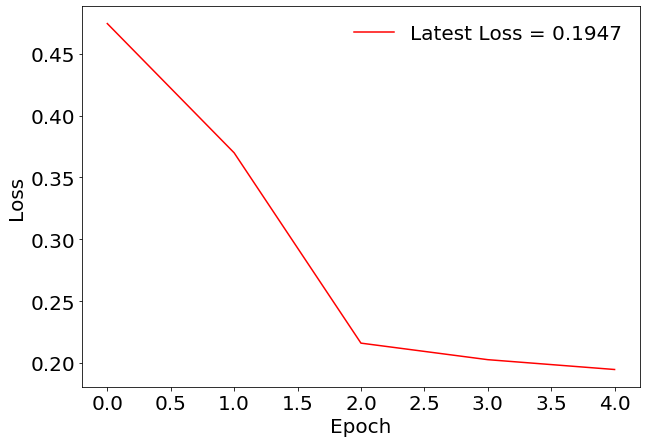

In [2]:
from IPython import display # for real time display
import torch
from torch.autograd import Variable
import torch.nn.functional as F
import torch.utils.data as Data
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import imageio

torch.manual_seed(1)    # reproducible

x = torch.unsqueeze(torch.linspace(-10, 10, 10000), dim=1)  # x data (tensor), shape=(100, 1)
y = torch.sin(x) + 0.2*torch.rand(x.size())                # noisy y data (tensor), shape=(100, 1)

#Define a network
net = torch.nn.Sequential(
        torch.nn.Linear(1, 200), # 1 input node
        torch.nn.LeakyReLU(),    # apply ReLU activation function
        torch.nn.Linear(200, 100), # 1 output node
        torch.nn.LeakyReLU(),    # apply ReLU activation function
        torch.nn.Linear(100, 1), # 1 output node
    )

optimizer = torch.optim.Adam(net.parameters(), lr=0.001) # Initialize Adam optimizer
loss_func = torch.nn.MSELoss()  # this is for regression mean squared loss

BATCH_SIZE = 200 # Batch size per epoch
EPOCH = 2000     # No. of epoch

torch_dataset = Data.TensorDataset(x, y)

loader = Data.DataLoader(
    dataset=torch_dataset, 
    batch_size=BATCH_SIZE, 
    shuffle=True, num_workers=2,)

# my_images = []  # for saving into gif
fig, ax = plt.subplots(figsize=(10,7))

epoch_list = [] # save epoch for plotting
loss_list = [] # save loss for plotting

# start training
for epoch in range(EPOCH):
    epoch_list += [epoch]
    for step, (batch_x, batch_y) in enumerate(loader): # for each training step

        prediction = net(batch_x)     # input x and predict based on x

        loss = loss_func(prediction, batch_y)     # must be (1. nn output, 2. target)

        optimizer.zero_grad()   # clear gradients for next train
        loss.backward()         # backpropagation, compute gradients
        optimizer.step()        # apply gradients

        if step == 1:
            # plot and show learning process
            plt.cla()
#             ax.set_title('Regression Analysis - model 3 Batches', fontsize=35)
#             ax.set_xlabel('Independent variable', fontsize=24)
#             ax.set_ylabel('Dependent variable', fontsize=24)
#             ax.set_xlim(-11.0, 13.0)
#             ax.set_ylim(-1.1, 1.2)
#             ax.scatter(batch_x.data.numpy(), batch_y.data.numpy(), color = "blue", alpha=0.2)
#             ax.scatter(batch_x.data.numpy(), prediction.data.numpy(), color='green', alpha=0.5)
#             ax.text(8.8, -0.8, 'Epoch = %d' % epoch,
#                     fontdict={'size': 24, 'color':  'red'})
#             ax.text(8.8, -0.95, 'Loss = %.4f' % loss.data.numpy(),
#                     fontdict={'size': 24, 'color':  'red'})
            loss_list += [loss.data.numpy()]
            plt.plot(epoch_list, loss_list, label = 'Latest Loss = %.4f' % loss.data.numpy(), color = 'r')
            plt.xlabel('Epoch', fontsize = 20)
            plt.ylabel('Loss', fontsize = 20)
            plt.xticks(fontsize = 20)
            plt.yticks(fontsize = 20)
            plt.legend(fontsize = 20, frameon= 0)
            
            display.clear_output(wait=True) #these two lines plots the data in real time
            display.display(fig)

# ====================== FOR SAVING INTO GIF ======================
#             # Used to return the plot as an image array 
#             # (https://ndres.me/post/matplotlib-animated-gifs-easily/)
#             fig.canvas.draw()       # draw the canvas, cache the renderer
#             image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
#             image  = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))
#             my_images.append(image)

# # save images as a gif    
# imageio.mimsave('./curve_2_model_3_batch.gif', my_images, fps=12)

# fig, ax = plt.subplots(figsize=(16,10))
# plt.cla()
# ax.set_title('Regression Analysis - model 3, Batches', fontsize=35)
# ax.set_xlabel('Independent variable', fontsize=24)
# ax.set_ylabel('Dependent variable', fontsize=24)
# ax.set_xlim(-11.0, 13.0)
# ax.set_ylim(-1.1, 1.2)
# ax.scatter(x.data.numpy(), y.data.numpy(), color = "blue", alpha=0.2)
# prediction = net(x)     # input x and predict based on x
# ax.scatter(x.data.numpy(), prediction.data.numpy(), color='green', alpha=0.5)
# plt.savefig('curve_2_model_3_batches.png')
# plt.show()

In [3]:
x

tensor([[-10.0000],
        [ -9.9980],
        [ -9.9960],
        ...,
        [  9.9960],
        [  9.9980],
        [ 10.0000]])

In [44]:
torch_dataset

In [34]:
loader

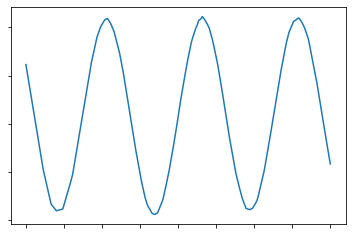

In [38]:
a = torch.unsqueeze(torch.linspace(-10, 10, 10000), dim=1)
plt.figure()
plt.plot(a.detach().numpy(), net(a).detach().numpy())